In [1]:
#Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import seaborn as sns

In [2]:
data = pd.read_excel(r'C:/Users/Dell/Desktop/Assignments/Clustering/EastWestAirlines.xlsx',sheet_name='data')

In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data.drop(['ID#','cc1_miles','cc2_miles','cc3_miles','Award?'],axis=1, inplace=True)

In [5]:
data

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403
3995,64385,0,981,5,0,0,1395
3996,73597,0,25447,8,0,0,1402
3997,54899,0,500,1,500,1,1401


In [6]:
#Defining the Normalizing function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
data_norm = norm_func(data)
data_norm.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


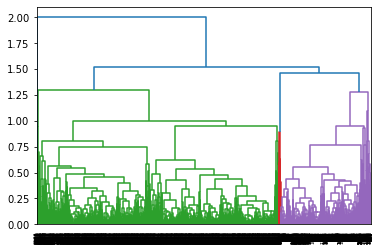

In [8]:
#Dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='complete'))

In [19]:
#Creating the HC algorithm for further mapping
hc = AgglomerativeClustering(n_clusters=6, affinity ='euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=6)

In [20]:
#Fitting the algorithm on the current dataset that will give us the cluster labels
y_hc = hc.fit_predict(data_norm)
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])

In [21]:
Clusters.head()

,Clusters
0,0
1,0
2,0
3,0
4,0


In [22]:
data['Cluster_ID']=Clusters

In [23]:
data.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster_ID
0,28143,0,174,1,0,0,7000,0
1,19244,0,215,2,0,0,6968,0
2,41354,0,4123,4,0,0,7034,0
3,14776,0,500,1,0,0,6952,0
4,97752,0,43300,26,2077,4,6935,0


In [24]:
data.groupby('Cluster_ID').agg(['mean']).reset_index()

,Cluster_ID,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean
0,0,7.302003e+04,142.177811,17094.597796,11.535437,437.60556,1.316804,4118.642374
1,1,1.601140e+05,500.000000,71954.000000,86.000000,30817.00000,53.000000,1373.000000
2,2,1.573260e+05,0.000000,54943.500000,63.000000,13461.50000,49.500000,1798.500000
3,3,1.704838e+06,0.000000,17108.000000,32.000000,4823.00000,23.000000,7283.000000
4,4,5.323200e+04,888.000000,80696.000000,65.000000,22100.00000,45.000000,3831.000000
5,5,5.298860e+05,7210.000000,23866.000000,26.000000,7741.00000,15.000000,8296.000000


In [25]:
data.groupby('Cluster_ID').agg(['count']).reset_index()

,Cluster_ID,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,count,count,count,count,count,count,count
0,0,3993,3993,3993,3993,3993,3993,3993
1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2
3,3,1,1,1,1,1,1,1
4,4,1,1,1,1,1,1,1
5,5,1,1,1,1,1,1,1


# Inferences
* Most datapoints fall under Cluster 0